In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#%matplotlib inline
sys.path.append('../SourceCode')
import bastien_utils
import morphoMaths                                                        

Using TensorFlow backend.


In [3]:
FILE_PATH = "../"

In [4]:
x_small, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
print('x_small shape:', x_small.shape)
x_small = x_small[:10]

x_small shape: (10000, 28, 28, 1)


In [5]:
x_small = morphoMaths.AMD_in_one_array(x_small[:,:,:,0], levels=4, step=1, init_step=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

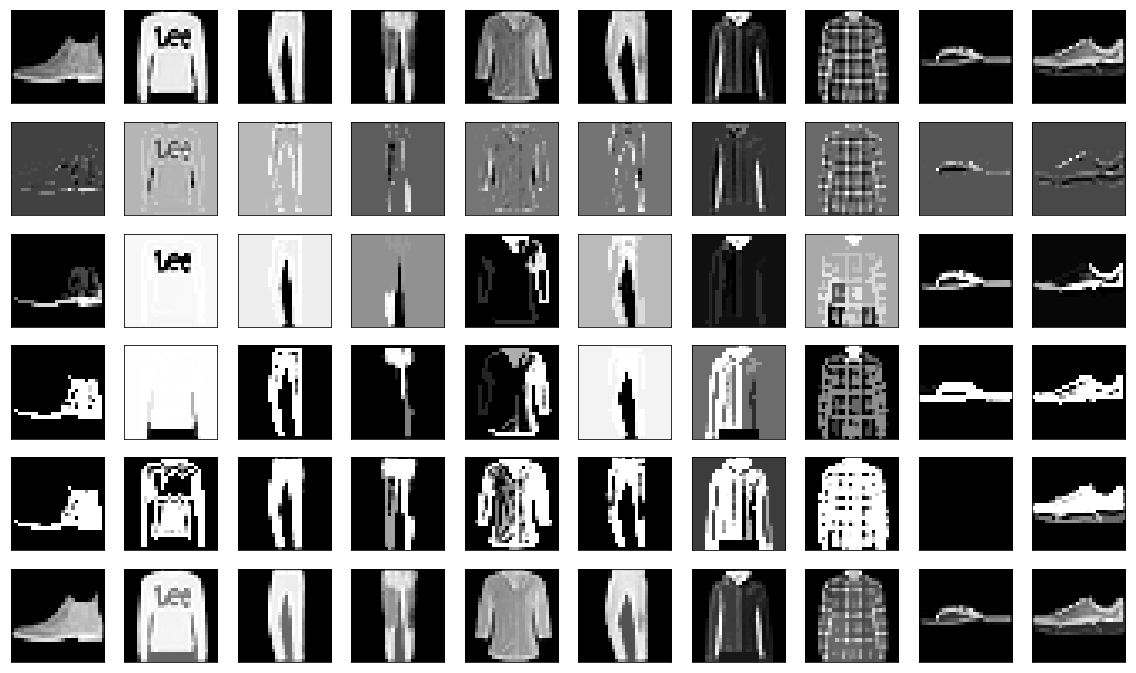

In [11]:
nbRow = 6
nbImages=10
plt.figure(figsize=(2*10, 2*6))
for i in range(nbRow):
    for j in range(nbImages):
        ax = plt.subplot(nbRow, nbImages,1 + nbImages*i + j)
        plt.imshow(x_small[j,:,:,i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

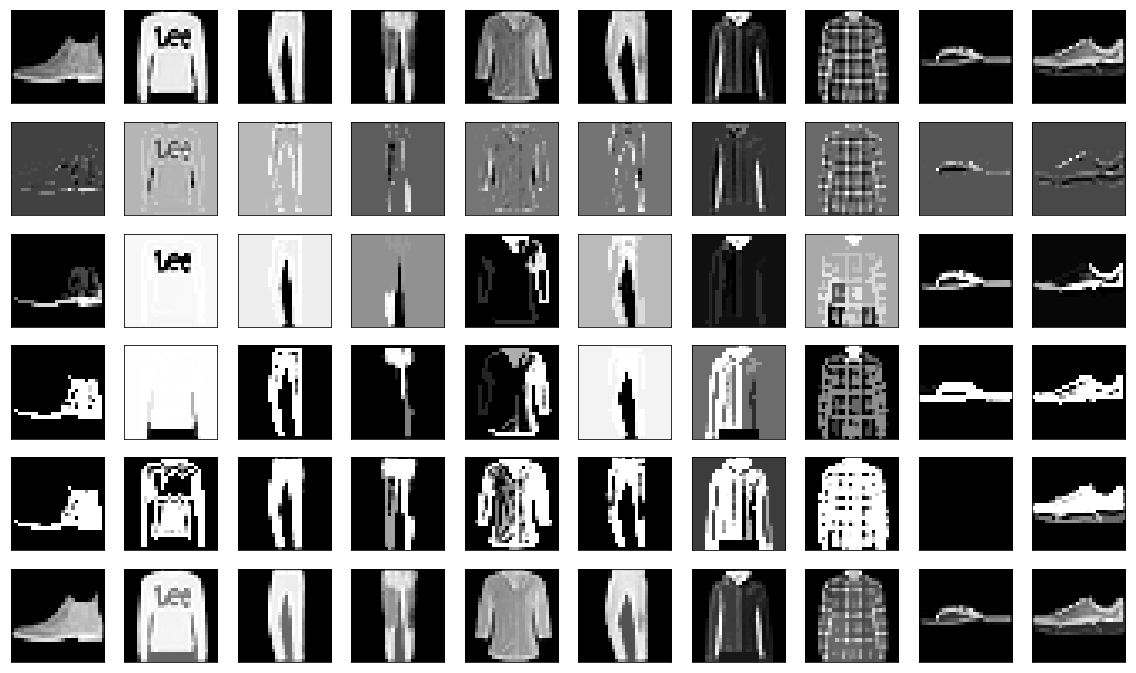

In [6]:
nbRow = 6
nbImages=10
plt.figure(figsize=(2*10, 2*6))
for i in range(nbRow):
    for j in range(nbImages):
        ax = plt.subplot(nbRow, nbImages,1 + nbImages*i + j)
        plt.imshow(x_small[j,:,:,i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()